# **Задание№2.3.**

In [5]:
#Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#Загрузка учебного датасета
df = pd.DataFrame = pd.read_csv("S02-hw-dataset.csv", sep=',')

In [32]:
#2.3.1 вывод первых несколько строк, информации и базовых характеристик датасета
df.head(50)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [26]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [27]:
#2.3.2 доля пропусков в каждом столбце
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [31]:
#наличие полностью дублирующих строк
print(df.duplicated().sum())

1


In [41]:
# Поиск подозрительных значений : возраст
suspicious_age = df[(df['age'] > 100) | (df['age'] < 0)]
if not suspicious_age.empty:
    print(f"Нереалистичный возраст в: {len(suspicious_age)} записях")
    display(suspicious_age)

Нереалистичный возраст в: 1 записях


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [47]:
# Поиск подозрительных значений : домен страны
suspicious_domain = df[(df['country'].str.len() != 2) | (df['country'].isna())]
if not suspicious_domain.empty:
    print(f"Не существующий код страны в: {len(suspicious_domain)} записях")
    display(suspicious_domain)

In [54]:
# Поиск подозрительных значений : колво товаров и сумма заказа
negative_checks = ['purchases', 'revenue']
for col in negative_checks:
    negative_count = (df[col] <= 0).sum()
    if negative_count > 0:
        print(f"\nОтрицательные значения в '{col}': {negative_count} записей")
        display(df[df[col] <= 0])


Отрицательные значения в 'purchases': 4 записей


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0



Отрицательные значения в 'revenue': 4 записей


,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


## Оценка качества данных
Были выявлены следующие проблемы:
- были найдены записи с возрастом более 100 лет
- обнаружены записи с нулевым(или отрицательным) количеством товаров в заказе
- выявлены записи с нулевой выручкой

## *Задание №2.3.3.*

In [69]:
# Частоты по странам
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [67]:
# Процентное распределение
df['country'].value_counts(normalize=True).round(4)*100

country
RU    31.71
FR    29.27
US    19.51
DE    14.63
CN     4.88
Name: proportion, dtype: float64

In [62]:
# Группировка по странам
country_stats = df.groupby('country').agg(
    user_count=('user_id', 'count'),
    avg_age=('age', 'mean'),
    avg_purchases=('purchases', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_user=('revenue', 'mean')
).round(2)

print(country_stats)

         user_count  avg_age  avg_purchases  total_revenue  \
country                                                      
CN                2    24.00           4.50           2108   
DE                6    34.60           6.50           8673   
FR               12    46.25           4.25           8111   
RU               13    30.08           4.77          10271   
US                8    36.71           4.62           4459   

         avg_revenue_per_user  
country                        
CN                    1054.00  
DE                    1445.50  
FR                     675.92  
RU                     790.08  
US                     557.38  


## Наблюдаемые тенденции:
В датасете больше всего пользователей из России(13 из 41) и франции(12 из 41). Пользователи из Германии показывают самые высокие средние показатели. Они совершают ~7 покупок на сумму 1445.5 денежных единиц(далее ДЕ). 
Есть следующее наблюдение: суммарная выручка с пользователей из Германии занимает 2 место(8673 ДЕ) уступая лишь пользователям из России(10271) ввиду количества пользователей. Интересно, что у покупателей из США самый низкий средний чек(557 ДЕ), хоть они и совершают покупки в среднем ~5 раз что сопоставимо с средним результатом по датасету. 

# **Задание№2.4.**

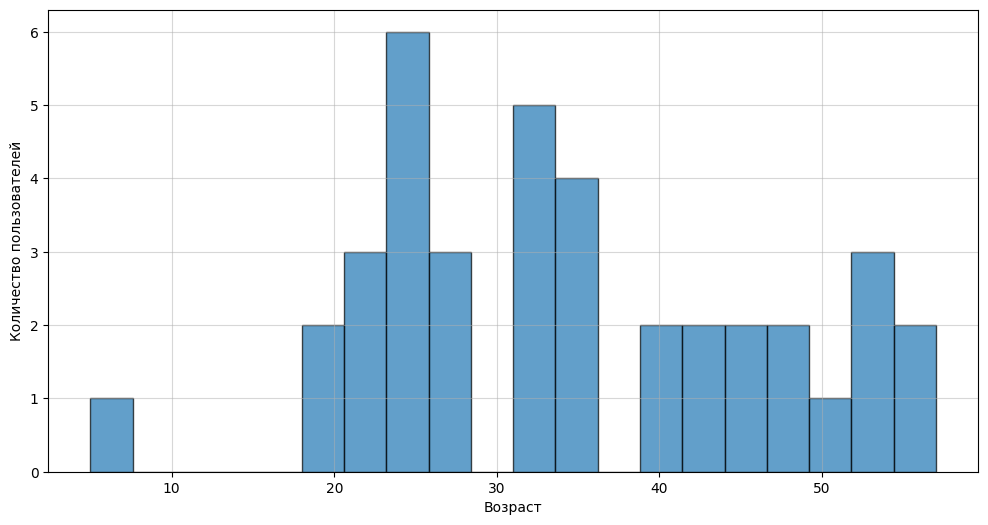

In [91]:
# Гистограма с распределением возраста
plt.figure(figsize=(12,6))
ageData = df[df['age'] <= 100]['age']
plt.hist(ageData, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.5)

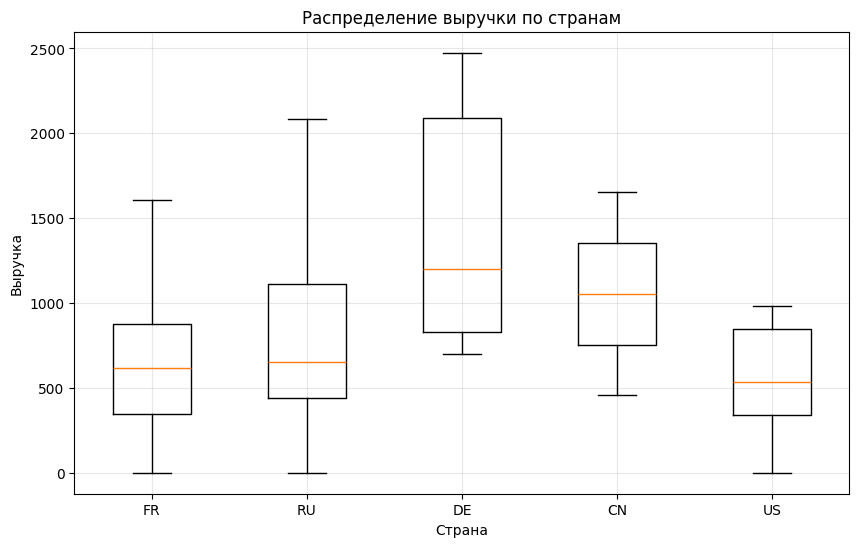

In [98]:
# Боксплот выручки по странам
plt.figure(figsize=(10, 6))

countries = ['FR', 'RU', 'DE', 'CN', 'US']
data = [df[df['country'] == c]['revenue'] for c in countries]

plt.boxplot(data, tick_labels=countries)
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.title('Распределение выручки по странам')
plt.grid(True, alpha=0.3)

plt.savefig('figures/revenue_boxplot.png')
plt.show()

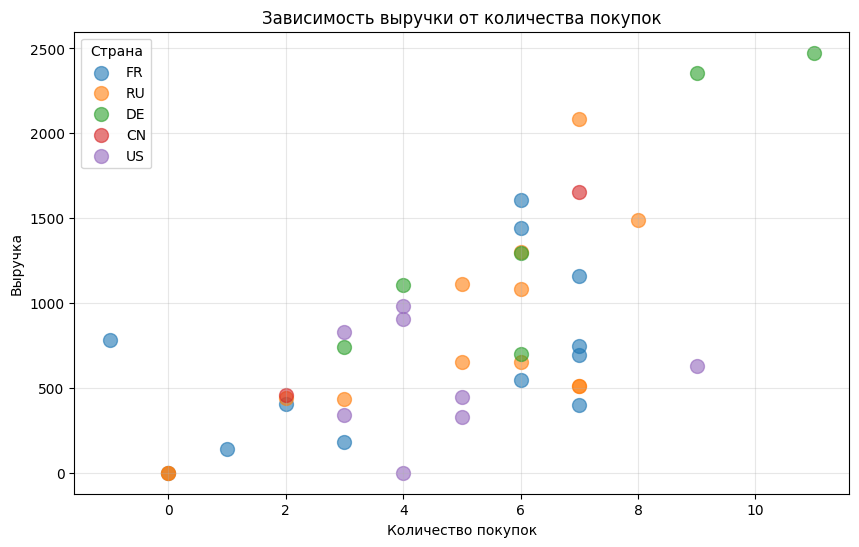

In [95]:
# выручка от количества покупок
plt.figure(figsize=(10, 6))

# Разные цвета для разных стран
colors = {'FR': 'blue', 'RU': 'red', 'DE': 'green', 'CN': 'orange', 'US': 'purple'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], label=country, alpha=0.6, s=100)

plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от количества покупок')
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)

plt.savefig('figures/purchases_revenue_scatter.png')
plt.show()